
# Comparison of LDA and PCA 2D projection of Mortgage dataset


The mortgage dataset contains 2 kind of decisons which are accepted and denied (0,1) with 21 attributes. We have decided to hand pick 6 attributes for the PCA and first 1000 observations as prove of concept for the PCA and LDAnalysis.

Principal Component Analysis (PCA) applied to this data identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that
account for the most variance *between classes*. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels. The LDA does not work for the binary class problem hence we tricked the algortihm by including a third class to the data (a single data observation as a new class).


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re, seaborn as sns
from sklearn.decomposition import PCA


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
train=pd.read_csv('/content/gdrive/My Drive/Babra/train_values.csv')
labels=pd.read_csv('/content/gdrive/My Drive/Babra/train_labels.csv')
test=pd.read_csv('/content/gdrive/My Drive/Babra/test_values.csv')
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [6]:
new_All=train.drop(['co_applicant'], axis=1)
All=pd.concat([new_All,labels.accepted],axis=1)
All.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [7]:
All=All.dropna()

Text(0, 0.5, 'loan_amount')

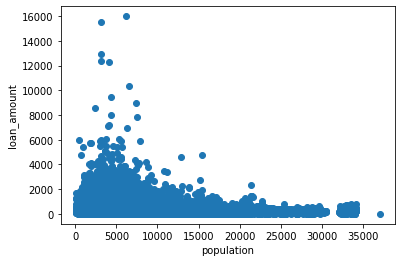

In [8]:
plt.figure()
plt.scatter(All['population'],All['loan_amount'])
plt.xlabel('population')
plt.ylabel('loan_amount')

Text(0, 0.5, 'ffiecmedian_family_income')

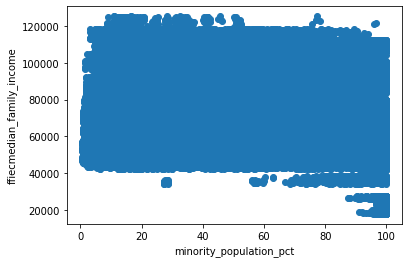

In [9]:
plt.figure()
plt.scatter(All['minority_population_pct'],All['ffiecmedian_family_income'])
plt.xlabel('minority_population_pct')
plt.ylabel('ffiecmedian_family_income')

Text(0, 0.5, 'number_of_owner-occupied_units')

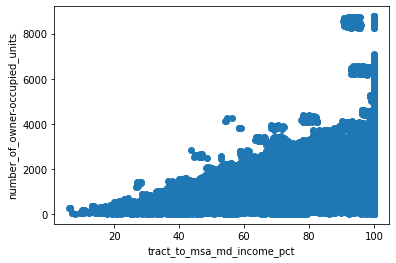

In [10]:
plt.figure()
plt.scatter(All['tract_to_msa_md_income_pct'],All['number_of_owner-occupied_units'])
plt.xlabel('tract_to_msa_md_income_pct')
plt.ylabel('number_of_owner-occupied_units')

#Selecting attributes and observations for PCA and LDA

In [11]:
Tapi=All[['minority_population_pct','applicant_income','applicant_sex','ffiecmedian_family_income','tract_to_msa_md_income_pct', 'number_of_owner-occupied_units','accepted']][:1000]
y=Tapi['accepted']
y[1000]=2
Tap=Tapi.drop(['accepted'], axis=1)

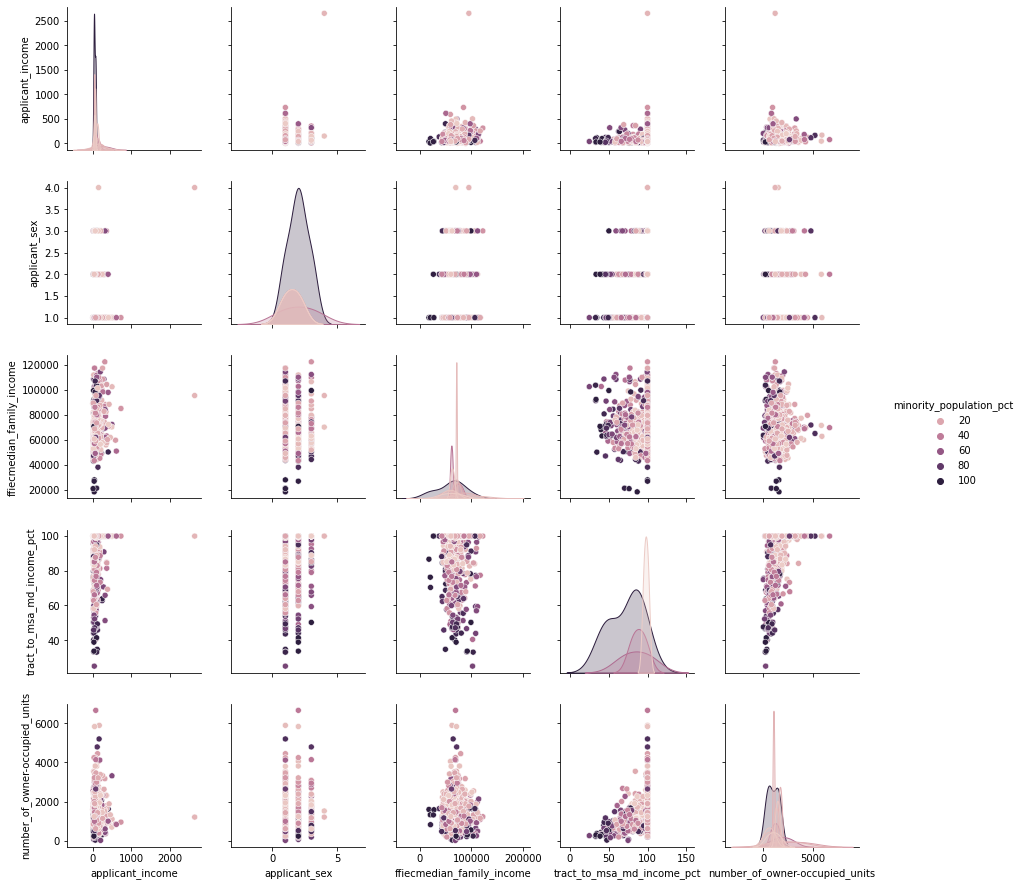

In [12]:
#Seaborn pair plot
sns.pairplot(Tap[['minority_population_pct','applicant_income','applicant_sex','ffiecmedian_family_income','tract_to_msa_md_income_pct', 'number_of_owner-occupied_units']], hue='minority_population_pct')

In [13]:
from sklearn.preprocessing import normalize
Tap = normalize(Tap)

In [14]:
#print(__doc__)
pca = PCA(n_components=3)
X_r = pca.fit(Tap).transform(Tap)
vari=np.round(pca.explained_variance_ratio_*100,2)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(vari))


explained variance ratio (first two components): [98.4   1.34  0.18]


Text(0.5, 1.0, 'PCA of IRIS dataset')

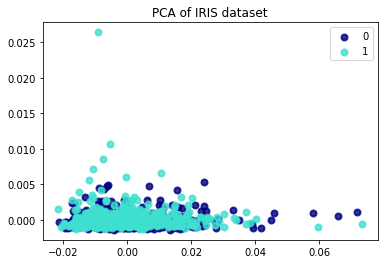

In [15]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['0','1']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of mortgage dataset')

In [16]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)

lda.fit(Tap, y)
X_r2 = lda.fit_transform(Tap, y)
varii=np.round(lda.explained_variance_ratio_*100,2)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(varii))




explained variance ratio (first two components): [96.83  3.17]


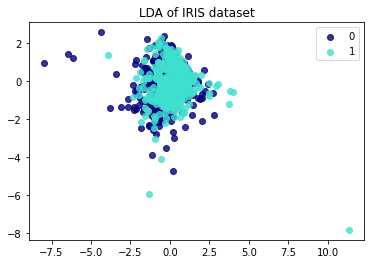

In [17]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], [0,1]):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of mortgage dataset')

plt.show()

For both case, the first two components explains around 99% of the variance in the data. The PCA has that the first component explained 98.4% of the variance and the second component explained 1.34% of the variance. The LDA has the first component explained 96.83% of the variance and the second component explained 3.17% of the variance in the dataset.